Prashna Prajapati

Problem- 1: Perform a classification task with knn from scratch.
 1. Load the Dataset:

 • Read the dataset into a pandas DataFrame.

In [22]:
import pandas as pd

In [23]:
# Load the datasets into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/Datasets-AI/diabetes.csv")

In [24]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


 • Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
 (e.g., check data types, missing values, summary statistics).

In [5]:
# Display the first few rows
df.head()

# Perform exploratory data analysis (EDA)
df.dtypes
df.isnull().sum()
df.describe()
df.info()
#Check distribution of the target variable
df['Outcome'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,count
Outcome,
0,500
1,268


 2. Handle Missing Data:

 • Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [25]:
# Assuming 'df' is already loaded as in the previous code

# Check for missing values again (good practice)
df.isnull().sum()

# If there are missing values (as indicated by the previous code)
# Impute missing values with the mean for numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
  if df[col].isnull().any():  # Check if column has missing values
    df[col] = df[col].fillna(df[col].mean())

# (Optional) Impute or drop missing values for categorical columns
# Example of imputing with mode (most frequent value) for a categorical column 'Outcome'
# if df['Outcome'].isnull().any():
#     df['Outcome'] = df['Outcome'].fillna(df['Outcome'].mode()[0])


#Alternative: Drop rows with any missing values
# df = df.dropna()

# Verify that there are no more missing values
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [26]:
df_cleaned = df.dropna()

 3. Feature Engineering:

 • Separate the feature matrix (X) and target variable (y).

 • Perform a train- test split from scratch using a 70% − 30% ratio.

In [27]:
# • Separate the feature matrix (X) and target variable (y).
X = df_cleaned.drop(columns=['Outcome'])
y = df_cleaned['Outcome']

# • Perform a train - test split from scratch using a 70% − 30% ratio.
split_index = int(0.7 * len(X))

shuffled_indices = np.random.permutation(len(X))
X = X.iloc[shuffled_indices]
y = y.iloc[shuffled_indices]

# Split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Display the resulting splits
print("Shape of Training Features (X_train):", X_train.shape)
print("Shape of Training Target (y_train):", y_train.shape)
print("Shape of Testing Features (X_test):", X_test.shape)
print("Shape of Testing Target (y_test):", y_test.shape)

Shape of Training Features (X_train): (537, 8)
Shape of Training Target (y_train): (537,)
Shape of Testing Features (X_test): (231, 8)
Shape of Testing Target (y_test): (231,)


 4. Implement KNN:

 • Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

 • Compute distances using Euclidean distance.

 • Write functions for:– Predicting the class for a single query.– Predicting classes for all test samples.

 • Evaluate the performance using accuracy

In [28]:
import numpy as np

def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

def predict_one(x_train, y_train, x_test, k):
  distances = [euclidean_distance(x_test, x) for x in x_train.values]
  k_indices = np.argsort(distances)[:k]
  k_nearest_labels = [y_train.iloc[i] for i in k_indices]
  # Predict the class label based on the majority class among the k-nearest neighbors.
  pred = max(set(k_nearest_labels), key=k_nearest_labels.count)
  return pred

def predict_all(x_train, y_train, x_test, k):
  predictions = [predict_one(x_train, y_train, x, k) for x in x_test.values]
  return np.array(predictions)

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

# Example usage (assuming X_train, X_test, y_train, y_test are defined)
k = 5  # Choose a value for k
y_pred = predict_all(X_train, y_train, X_test, k)
acc = accuracy(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.7316017316017316


 Problem- 2- Experimentation:
 1. Repeat the Classification Task:

 • Scale the Feature matrix X.

 • Use the scaled data for training and testing the kNN Classifier.

 • Record the results.

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data (using the same scaler fitted on the training data)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame (optional, but useful for easier handling)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Now use X_train_scaled and X_test_scaled with your kNN classifier
k = 5  # Choose a value for k
y_pred_scaled = predict_all(X_train_scaled, y_train, X_test_scaled, k)
acc_scaled = accuracy(y_test, y_pred_scaled)
print(f"Accuracy with scaled data: {acc_scaled}")

Accuracy with scaled data: 0.7619047619047619


 2. Comparative Analysis: Compare the Results

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
 versus the scaled dataset.

 • Discuss:

 – How scaling impacted the KNN performance.

 – The reason for any observed changes in accuracy.

In [30]:
print(f"Accuracy on original data: {acc}")
print(f"Accuracy on scaled data: {acc_scaled}")

Accuracy on original data: 0.7316017316017316
Accuracy on scaled data: 0.7619047619047619


 Problem- 3- Experimentation with k:
 1. Vary the number of neighbors- k:

 • Run the KNN model on both the original and scaled datasets for a range of:

 k= 1,2,3,...15

 • For each k, record:

 – Accuracy.

 – Time taken to make predictions.

In [32]:
import time

results = []

for k in range(1, 16):
  start_time = time.time()
  y_pred = predict_all(X_train, y_train, X_test, k)
  end_time = time.time()
  acc = accuracy(y_test, y_pred)
  results.append({
      'k': k,
      'dataset': 'original',
      'accuracy': acc,
      'time': end_time - start_time
  })

  start_time = time.time()
  y_pred_scaled = predict_all(X_train_scaled, y_train, X_test_scaled, k)
  end_time = time.time()
  acc_scaled = accuracy(y_test, y_pred_scaled)
  results.append({
      'k': k,
      'dataset': 'scaled',
      'accuracy': acc_scaled,
      'time': end_time - start_time
  })

results_df = pd.DataFrame(results)
results_df

,k,dataset,accuracy,time
0,1,original,0.679654,1.497415
1,1,scaled,0.744589,1.312137
2,2,original,0.740260,0.816163
3,2,scaled,0.731602,0.792395
4,3,original,0.705628,0.810411
5,3,scaled,0.744589,0.826295
6,4,original,0.735931,0.812540
7,4,scaled,0.757576,0.801807
8,5,original,0.731602,0.827546
9,5,scaled,0.761905,0.801784


 2. Visualize the Results:

 • Plot the following graphs:

 – k vs. Accuracy for original and scaled datasets.

 – k vs. Time Taken for original and scaled datasets.

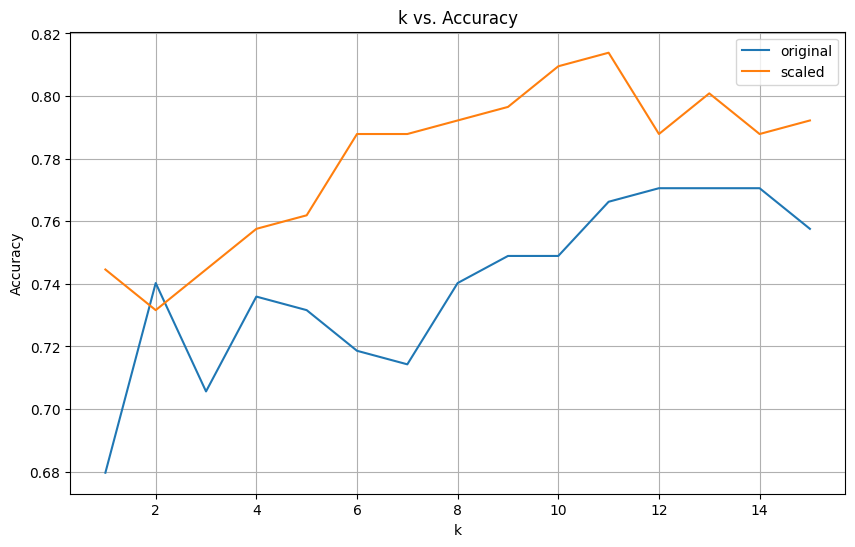

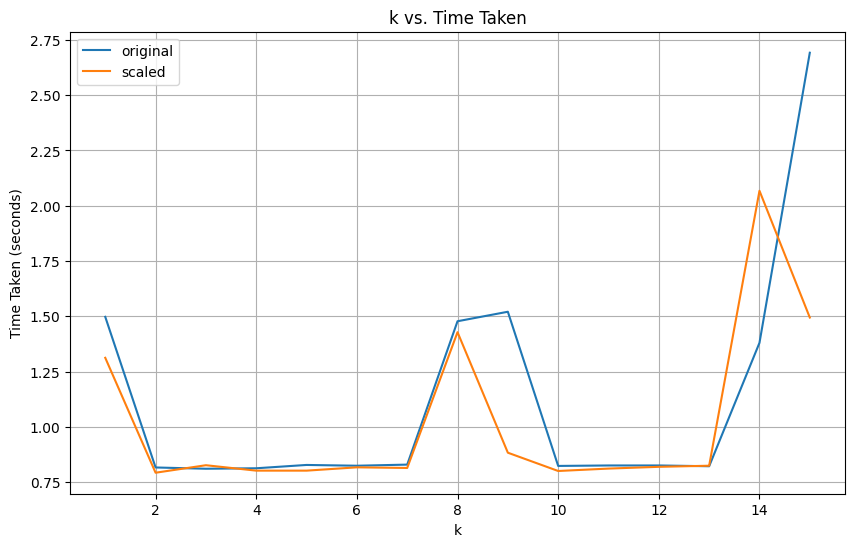

In [34]:
import matplotlib.pyplot as plt

# Assuming results_df is already created as in the previous code

# Plot k vs. Accuracy
plt.figure(figsize=(10, 6))
for dataset in results_df['dataset'].unique():
    subset = results_df[results_df['dataset'] == dataset]
    plt.plot(subset['k'], subset['accuracy'], label=dataset)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot k vs. Time Taken
plt.figure(figsize=(10, 6))
for dataset in results_df['dataset'].unique():
    subset = results_df[results_df['dataset'] == dataset]
    plt.plot(subset['k'], subset['time'], label=dataset)
plt.xlabel('k')
plt.ylabel('Time Taken (seconds)')
plt.title('k vs. Time Taken')
plt.legend()
plt.grid(True)
plt.show()

 3. Analyze and Discuss:

 • Discuss how the choice of k affects the accuracy and computational cost.

 • Identify the optimal k based on your analysis.

In [35]:
optimal_k_original = results_df[results_df['dataset'] == 'original']['accuracy'].idxmax()
optimal_k_scaled = results_df[results_df['dataset'] == 'scaled']['accuracy'].idxmax()

print(f"Optimal k for original dataset: {results_df.loc[optimal_k_original, 'k']}")
print(f"Optimal k for scaled dataset: {results_df.loc[optimal_k_scaled, 'k']}")

Optimal k for original dataset: 12
Optimal k for scaled dataset: 11


 Problem- 4- Additional Questions {Optional- But Highly Recommended}:

 • Discuss the challenges of using KNN for large datasets and high-dimensional data.

Challenges of using KNN for large datasets and high-dimensional data:

i) Computational Cost:

KNN takes a lot of time to calculate distances between all data points. The time it takes grows with both the number of data points and the number of features (dimensions). So, with large datasets and many features, making predictions can be very slow.

ii) Curse of Dimensionality:

When there are too many features, the distances between points become very similar. This makes it hard to find truly "nearest" neighbors because everything seems to be the same distance apart, which reduces the accuracy of the algorithm.

iii) Memory Usage:

KNN needs to keep all the data in memory. If the dataset is very large, this can take up too much memory, which can slow things down or even cause crashes if the system runs out of memory.

• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
 reduction)

Strategies to improve the efficiency of KNN:

i. Approximate Nearest Neighbors (ANN):

Instead of calculating exact distances for all points, use faster methods like k-d trees, ball trees, or locality-sensitive hashing (LSH) to quickly find nearby points. This sacrifices a small bit of accuracy for a big speed boost.

ii. Dimensionality Reduction:

Reduce the number of features (dimensions) in the data using techniques like PCA or t-SNE. This makes the data simpler, faster to process, and helps with the problem of high-dimensional data.

iii. Data Subsampling:

Select a smaller, random subset of the data that still represents the overall dataset. This speeds up the process but may lose some details from the full dataset.

iv. Optimized Data Structures:

Use special data structures like KD-trees or Ball trees to organize the data in a way that makes it easier and faster to find nearest neighbors.

v. Locality Sensitive Hashing (LSH):

Use LSH to create hash functions that group similar points together. This helps to quickly find approximate neighbors without checking every distance.

vi. Hybrid Methods:

Combine approximate methods (like ANN) with dimensionality reduction to get both faster results and better accuracy.